In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv('dane.csv') 
print(df)
print(df.shape)
df.describe()

       vendor_id      pickup_datetime  ... imp_surcharge  total_amount
0              2  2015-12-25T00:21:40  ...           0.3         16.30
1              1  2015-08-31T16:46:04  ...           0.3          7.30
2              2  2015-07-27T16:48:11  ...           0.3          6.96
3              2  2015-03-26T07:46:58  ...           0.3         13.80
4              1  2015-02-10T12:39:44  ...           0.3         16.60
...          ...                  ...  ...           ...           ...
15995          1  2015-06-21T19:13:53  ...           0.3          6.80
15996          2  2015-11-09T14:14:37  ...           0.3         44.30
15997          1  2015-03-06T22:00:18  ...           0.3          7.30
15998          1  2015-03-05T08:29:08  ...           0.3         10.75
15999          2  2015-10-23T20:02:07  ...           0.3         21.36

[16000 rows x 19 columns]
(16000, 19)


,vendor_id,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,7573.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,1.525438,1.682875,2.941444,-72.832139,40.121517,1.037370,-72.882695,40.150035,1.381188,12.825374,0.311563,0.497828,1.670577,0.289778,0.298444,15.894782
std,0.499368,1.331697,3.555983,9.120256,5.024170,0.278292,8.917933,4.912823,0.500524,11.745207,0.362629,0.034222,2.326978,1.332345,0.022068,13.864437
min,1.000000,0.000000,0.000000,-74.191437,0.000000,1.000000,-74.474709,0.000000,1.000000,-59.300000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-59.600000
25%,1.000000,1.000000,1.000000,-73.991997,40.735393,1.000000,-73.991302,40.733820,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.500000
50%,2.000000,1.000000,1.700000,-73.981522,40.752514,1.000000,-73.979725,40.753294,1.000000,9.500000,0.000000,0.500000,1.150000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.200000,-73.966675,40.767866,1.000000,-73.962715,40.768464,2.000000,14.500000,0.500000,0.500000,2.260000,0.000000,0.300000,17.760000
max,2.000000,6.000000,51.640000,0.000000,40.897366,6.000000,0.000000,41.107162,4.000000,655.350000,1.500000,0.500000,34.500000,24.330000,0.300000,655.650000


In [58]:
df = df.dropna()

In [60]:
Y=df[['tip_amount']].values
X=df[['trip_distance']].values

zmienić wartości z wymienionych kolumn na tablice array

df.to_numpy()

In [84]:
df.to_numpy()

array([['2015-07-27T16:48:11', '2015-07-27T16:50:06', 0.68, ..., 0.0,
        0.3, 6.96],
       ['2015-08-21T17:33:46', '2015-08-21T17:40:55', 0.96, ..., 0.0,
        0.3, 9.8],
       ['2015-10-15T22:45:42', '2015-10-15T23:02:38', 3.69, ..., 0.0,
        0.3, 18.96],
       ...,
       ['2015-11-01T07:29:12', '2015-11-01T07:37:12', 1.68, ..., 0.0,
        0.3, 10.56],
       ['2015-12-14T22:46:10', '2015-12-14T22:54:48', 1.4, ..., 0.0, 0.3,
        10.3],
       ['2015-10-23T20:02:07', '2015-10-23T20:22:02', 4.24, ..., 0.0,
        0.3, 21.36]], dtype=object)

In [61]:
import statsmodels.api as sm

y = ['tip_amount']

x = [
     ['trip_distance'],
     ['total_amount'],
     ['fare_amount']
     ]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

transakcje tylko dla płatności kartą, i dla jednego pasażera

In [62]:
df = df[df.payment_type != 2]
print(df)

           pickup_datetime     dropoff_datetime  ...  imp_surcharge  total_amount
2      2015-07-27T16:48:11  2015-07-27T16:50:06  ...            0.3          6.96
8      2015-08-21T17:33:46  2015-08-21T17:40:55  ...            0.3          9.80
13     2015-10-15T22:45:42  2015-10-15T23:02:38  ...            0.3         18.96
15     2015-09-22T23:19:53  2015-09-22T23:34:23  ...            0.3         15.80
16     2015-07-10T16:36:55  2015-07-10T16:48:21  ...            0.3         12.30
...                    ...                  ...  ...            ...           ...
15986  2015-11-05T08:01:50  2015-11-05T08:02:30  ...            0.3          0.30
15991  2015-07-24T01:51:19  2015-07-24T02:02:51  ...            0.3         20.50
15992  2015-11-01T07:29:12  2015-11-01T07:37:12  ...            0.3         10.56
15993  2015-12-14T22:46:10  2015-12-14T22:54:48  ...            0.3         10.30
15999  2015-10-23T20:02:07  2015-10-23T20:22:02  ...            0.3         21.36

[4738 rows x 17

In [ ]:
df.isna().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
rate_code             0
store_and_fwd_flag    0
dropoff_longitude     0
dropoff_latitude      0
payment_type          0
fare_amount           0
extra                 0
mta_tax               0
tip_amount            0
tolls_amount          0
imp_surcharge         0
total_amount          0
dtype: int64

In [ ]:
df = df.dropna()
print(df)

       vendor_id      pickup_datetime  ... imp_surcharge  total_amount
2              2  2015-07-27T16:48:11  ...           0.3          6.96
8              2  2015-08-21T17:33:46  ...           0.3          9.80
13             2  2015-10-15T22:45:42  ...           0.3         18.96
15             2  2015-09-22T23:19:53  ...           0.3         15.80
16             2  2015-07-10T16:36:55  ...           0.3         12.30
...          ...                  ...  ...           ...           ...
15986          1  2015-11-05T08:01:50  ...           0.3          0.30
15991          1  2015-07-24T01:51:19  ...           0.3         20.50
15992          2  2015-11-01T07:29:12  ...           0.3         10.56
15993          1  2015-12-14T22:46:10  ...           0.3         10.30
15999          2  2015-10-23T20:02:07  ...           0.3         21.36

[4738 rows x 19 columns]


In [ ]:
df.to_csv (r'C:\final_data.csv')

In [63]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [64]:
target_column = ['tip_amount'] 
predictors = ['trip_distance', 'fare_amount', 'total_amount']

In [65]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3316, 3)
(1422, 3)


In [24]:
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

Widoczne zależności między zmiennymi, na skrzyżowaniu tych samych komórek rozkład częstości.

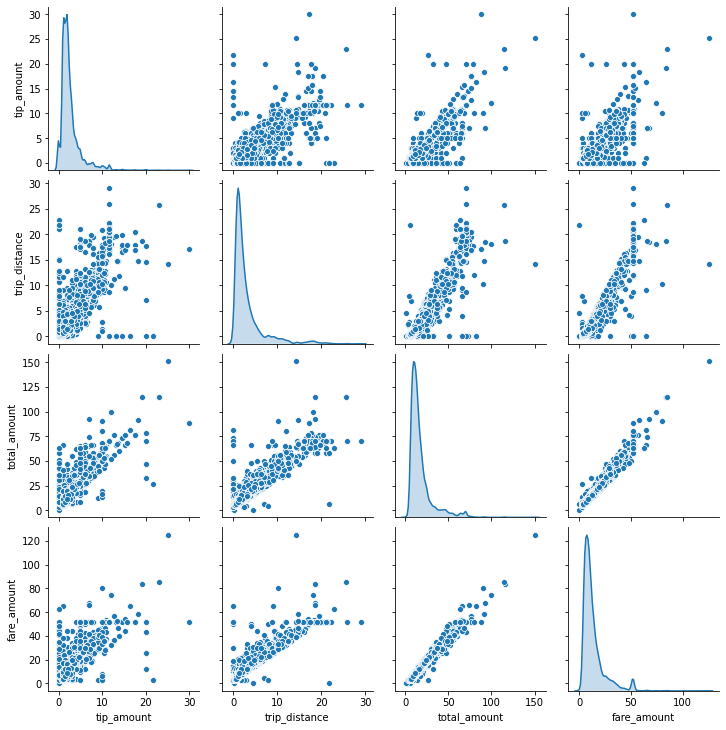

In [66]:
sns.pairplot(train_dataset[["tip_amount", "trip_distance", "total_amount", "fare_amount"]], diag_kind="kde")

In [67]:
def build_model():
  model = keras.Sequential

  optimizer = df.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [69]:
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [71]:
prediction_network = Sequential()
prediction_network.add(Dense(units=10, kernel_initializer='uniform', activation='relu', input_dim=10))
prediction_network.add(Dense(units=10, kernel_initializer='uniform', activation = 'relu'))
prediction_network.add(Dense(units=1, kernel_initializer='uniform'))
prediction_network.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [88]:
model.fit(train_dataset, epochs = 50, batch_size = 128)

ValueError: ignored

In [92]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150


ValueError: ignored

In [79]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: ignored

In [80]:
X_new = np.array([[21]])
y_new=model.predict(X_new)
print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))

X=[21], Predicted=[0.4537097]


In [81]:
model.save('trained_model.h5')

In [82]:
from keras.models import load_model
trained_model = load_model('trained_model.h5')

Model regresji liniowej z 3 statystycznie istotnymi zmiennymi:
*
*
*
Rejestr przejazdów Żółtych TAXI w NYC /2015
Zawiera takie pola(nazwy kolumn) jak: współprzędne rozpoczęcia i zakończenia kursu, 
 czas kursu
 łączna kwota do zapłaty,
  wysokość napiwku,
   liczba pasażerów, strefa, taryfa, stałe i dodatkowe opłaty



Badania przeprowadzone na podstawie ogólnodostępnej bazy na Google Cloud Platform (baza liczy okolo 1 700 000 rekordów).
Na potrzeby badania pobrano zbiór 17 000 rekordów

Po wstępnej analizie struktury danych, wyselekcjonowano dane do analizy

1 osoba, płatność kartą, 
